**Importing necessary libraries**

In [1]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set(style="whitegrid", color_codes=True)
matplotlib.style.use('ggplot')

In [2]:
%matplotlib inline

**Importing the Excel data set**

In [3]:
file = r'dataset_anon_sample (Autosaved).xlsx'

In [4]:
df= pd.read_excel(file)#, encoding='utf-8')
df.head()

,a,b,c,d,e,f,g,h,i,j,...,n,o,p,q,r,s,t,u,v,w
0,3,2,11.000000,14.177447,0,0.0,1,0,1,1,...,0,0,0,100.0000,0.0,0.000,0.000000,0,0.000000,1
1,7,3,9.428571,10.130106,0,0.0,1,0,2,1,...,1,0,0,87.5000,0.0,0.000,12.500000,0,0.000000,1
2,51,8,12.901961,71.800071,0,0.0,2,0,5,2,...,0,0,11,79.6875,0.0,3.125,0.000000,0,17.187500,5
3,3,1,2.000000,3.464102,0,0.0,1,0,,1,...,3,0,0,50.0000,0.0,0.000,50.000000,0,0.000000,1
4,11,4,5.909091,3.753786,0,0.0,1,0,1,1,...,2,0,9,50.0000,0.0,0.000,9.090909,0,40.909091,1


In [5]:
df.shape

(29, 23)

**Some data preprocessing**

In [6]:
df.dtypes


a      int64
b      int64
c    float64
d    float64
e      int64
f    float64
g      int64
h      int64
i     object
j      int64
k      int64
l      int64
m      int64
n      int64
o      int64
p      int64
q    float64
r    float64
s    float64
t    float64
u      int64
v    float64
w      int64
dtype: object

In [7]:
#df['i'] = df['i'].astype(float)
df['i'] = pd.to_numeric(df['i'],errors='coerce')

In [8]:
df.dtypes

a      int64
b      int64
c    float64
d    float64
e      int64
f    float64
g      int64
h      int64
i    float64
j      int64
k      int64
l      int64
m      int64
n      int64
o      int64
p      int64
q    float64
r    float64
s    float64
t    float64
u      int64
v    float64
w      int64
dtype: object

In [9]:
df.isnull().sum()

a    0
b    0
c    0
d    0
e    0
f    0
g    0
h    0
i    5
j    0
k    0
l    0
m    0
n    0
o    0
p    0
q    0
r    0
s    0
t    0
u    0
v    0
w    0
dtype: int64

In [10]:
df2 = df.fillna(df['i'].mean())

In [11]:
df2.isnull().sum()

a    0
b    0
c    0
d    0
e    0
f    0
g    0
h    0
i    0
j    0
k    0
l    0
m    0
n    0
o    0
p    0
q    0
r    0
s    0
t    0
u    0
v    0
w    0
dtype: int64

In [12]:
df2.describe()

,a,b,c,d,e,f,g,h,i,j,...,n,o,p,q,r,s,t,u,v,w
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.0,29.000000,29.000000,...,29.000000,29.0,29.000000,29.000000,29.000000,29.000000,29.000000,29.0,29.000000,29.000000
mean,21.862069,5.137931,6.215178,9.448371,0.034483,0.052247,1.068966,0.0,1.666667,1.068966,...,1.379310,0.0,1.965517,81.003681,0.207111,2.008279,9.711531,0.0,7.069398,1.344828
std,21.820246,4.477915,3.250498,13.132727,0.185695,0.281357,0.257881,0.0,0.872872,0.257881,...,1.293218,0.0,3.364550,17.298557,0.893824,9.270113,12.600931,0.0,10.590264,0.813979
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.000000,1.000000,...,0.000000,0.0,0.000000,33.333333,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
25%,4.000000,2.000000,4.488889,4.103425,0.000000,0.000000,1.000000,0.0,1.000000,1.000000,...,0.000000,0.0,0.000000,78.571429,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
50%,14.000000,4.000000,6.360465,6.390670,0.000000,0.000000,1.000000,0.0,1.666667,1.000000,...,1.000000,0.0,0.000000,83.333333,0.000000,0.000000,5.882353,0.0,0.000000,1.000000
75%,37.000000,7.000000,8.074074,10.130106,0.000000,0.000000,1.000000,0.0,2.000000,1.000000,...,2.000000,0.0,2.000000,91.304348,0.000000,0.000000,12.500000,0.0,10.666667,1.000000
max,86.000000,21.000000,12.901961,71.800071,1.000000,1.515152,2.000000,0.0,5.000000,2.000000,...,5.000000,0.0,11.000000,100.000000,4.672897,50.000000,50.000000,0.0,40.909091,5.000000


***********************    ***********************    *************************    *************************************

I still need to investigate if scaling is really necessary in this data set. I tried MinMax and StandardScaler and see they give similar result, but they are conflicting with the Silhouette analysis, so will leave it out till i see the full data set when i can further investigate.

In [13]:
#To give equal importance to all features, we need to scale the continuous features. We will be using 
#scikit-learn’s MinMaxScaler as the feature matrix is a mix of binary and continuous features . Other alternatives 
#includes StandardScaler.

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#scaler.fit(df2)
#df3 = scaler.transform(df2)

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(df2)
#df3 = scaler.transform(df2)

*******************************************************************************************************************************

**PCA plot on the data detect optimum # of dimensions**

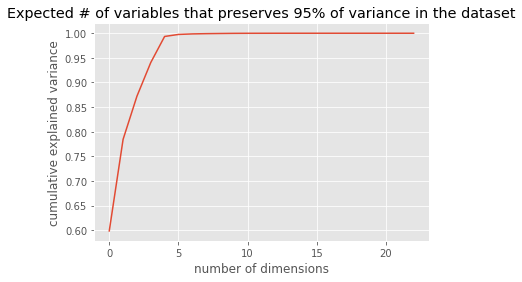

In [14]:
#pca = PCA(n_components=0.95).fit(df2.values)
pca = PCA().fit(df2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of dimensions')
plt.ylabel('cumulative explained variance')
plt.title('Expected # of variables that preserves 95% of variance in the dataset')
plt.show()

**This also agrees with the PCA variability test showing that 5 dimensions are the optimum number of dimensions**

In [15]:
pca = PCA(n_components = 0.95) 
df4 = pca.fit_transform(df2)
df4.shape

(29, 5)

From the above, we can see that predictors or dimension greater than 9 adds little or nothing to the variance in the data set, because about 95% of variability comes from just 8 variables. So, it's advisable to limit it to that. 

**Elbow Method of KMeans to detect the optimum number of required clusters**

In [16]:
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k, random_state=10)
    km = km.fit(df4)
    Sum_of_squared_distances.append(km.inertia_)

In [17]:

km.labels_

array([25, 15,  4,  8, 11,  2,  6, 20,  9,  0, 19, 23, 12, 16, 26, 27,  7,
        5, 17, 18, 13, 14, 24,  3, 22, 21,  1, 10, 28])

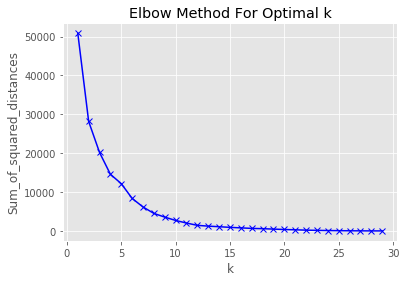

In [18]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**From the above we see the optimum number of clusters should be in the elbow between about k = 3 and 13. We can narrow this down by running the plot of the Silhouette analysis as shown below**

**Silhouette analysis to find the optimum number of clusters for the data set**

In [19]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

For n_clusters = 3 The average silhouette_score is : 0.396553764356818
For n_clusters = 4 The average silhouette_score is : 0.39591586536782086
For n_clusters = 5 The average silhouette_score is : 0.4003382529445646
For n_clusters = 6 The average silhouette_score is : 0.42487119660557804
For n_clusters = 7 The average silhouette_score is : 0.44942294356059187
For n_clusters = 8 The average silhouette_score is : 0.4385579736105573
For n_clusters = 9 The average silhouette_score is : 0.4030167357913581
For n_clusters = 10 The average silhouette_score is : 0.4086597702214412
For n_clusters = 11 The average silhouette_score is : 0.3882400683227588
For n_clusters = 12 The average silhouette_score is : 0.37464646775305394
For n_clusters = 13 The average silhouette_score is : 0.33316765537380816


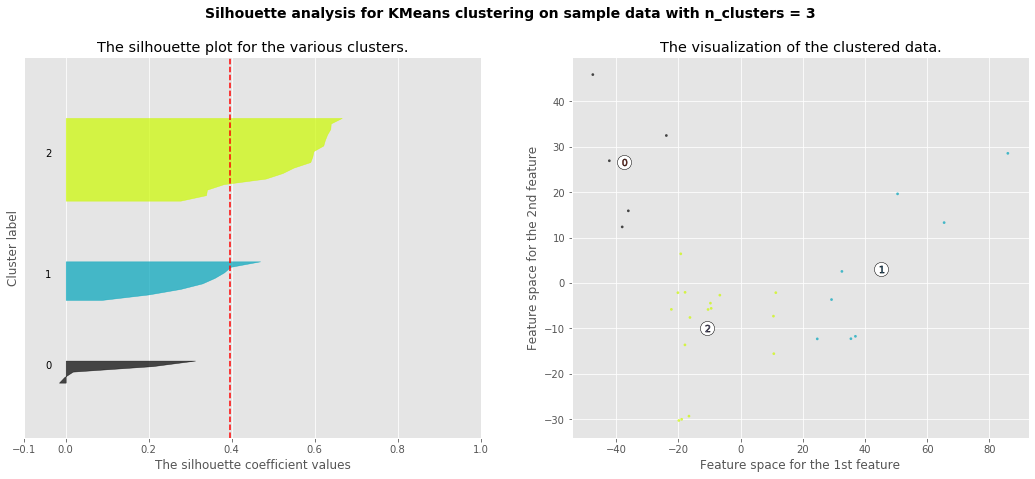

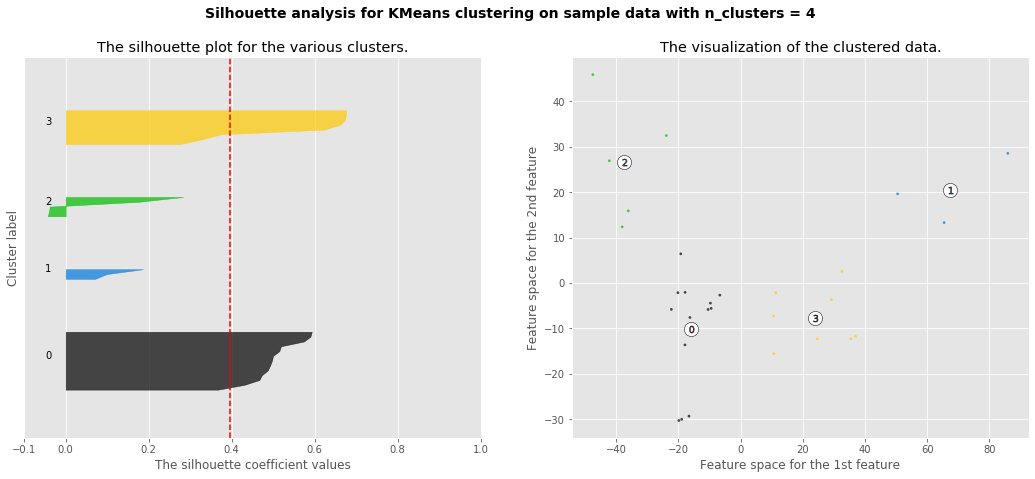

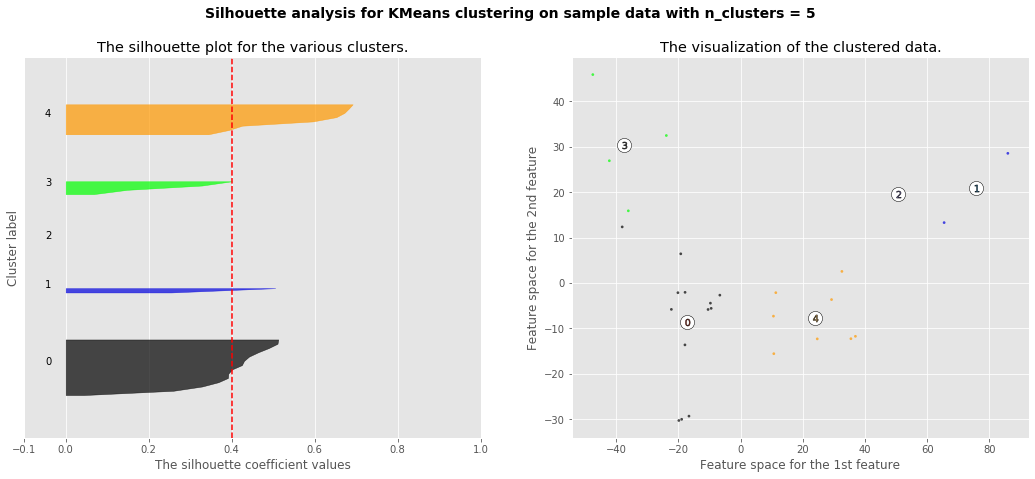

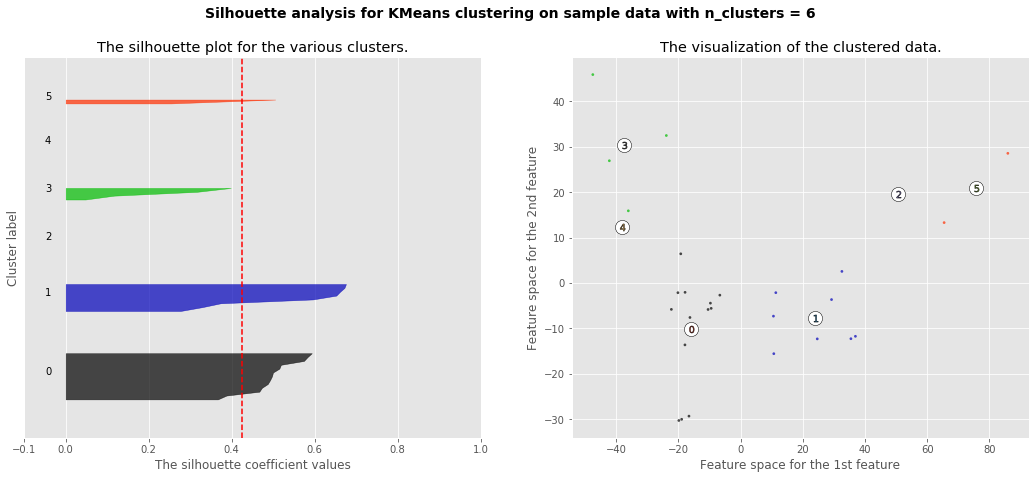

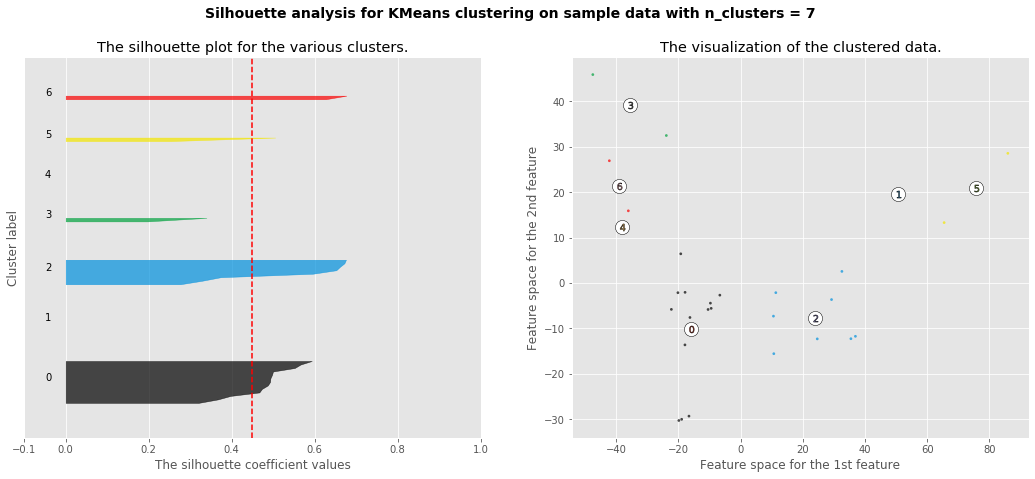

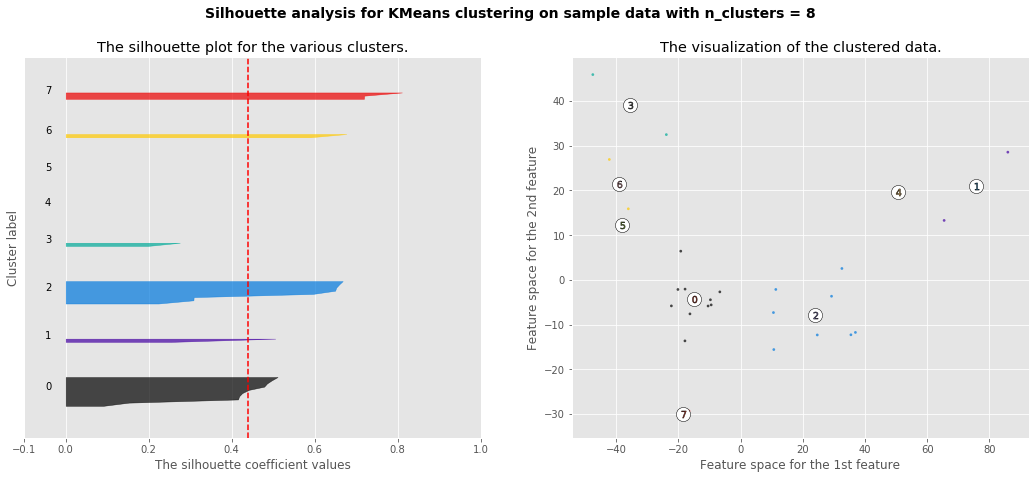

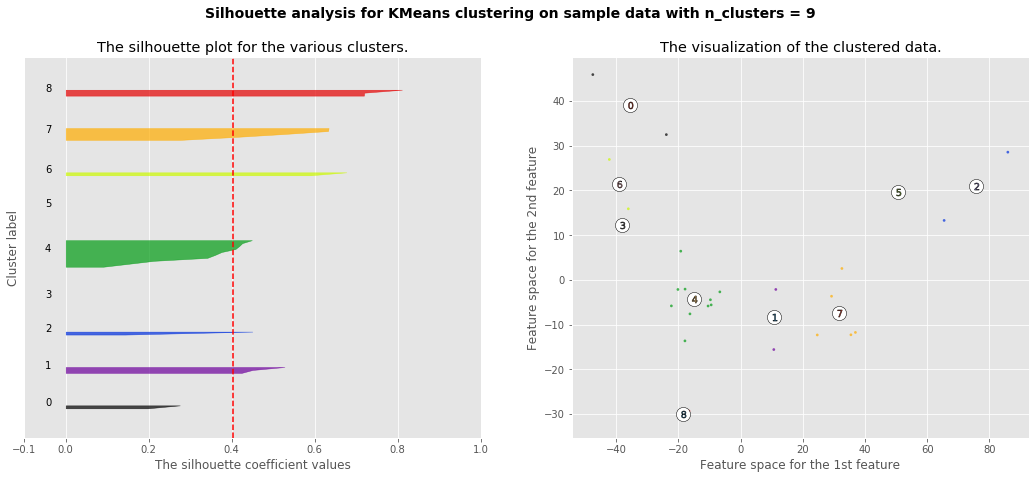

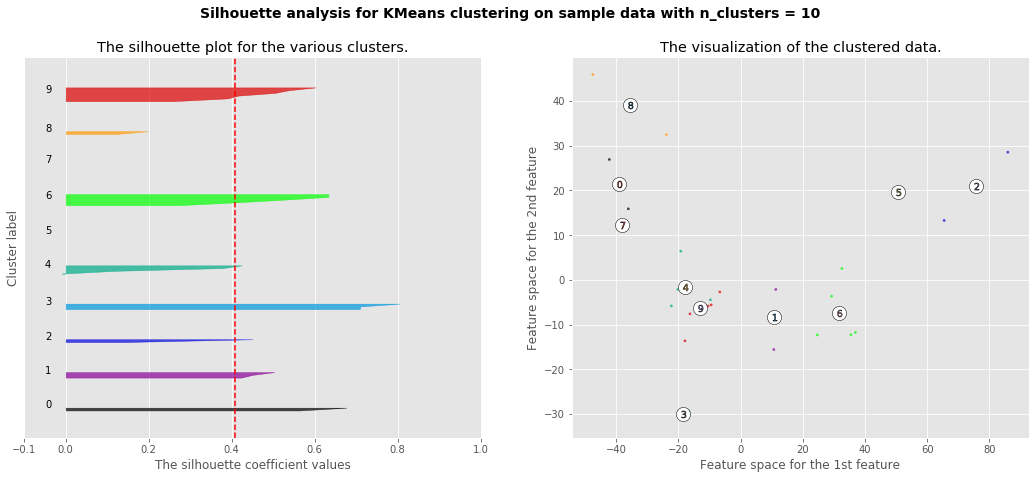

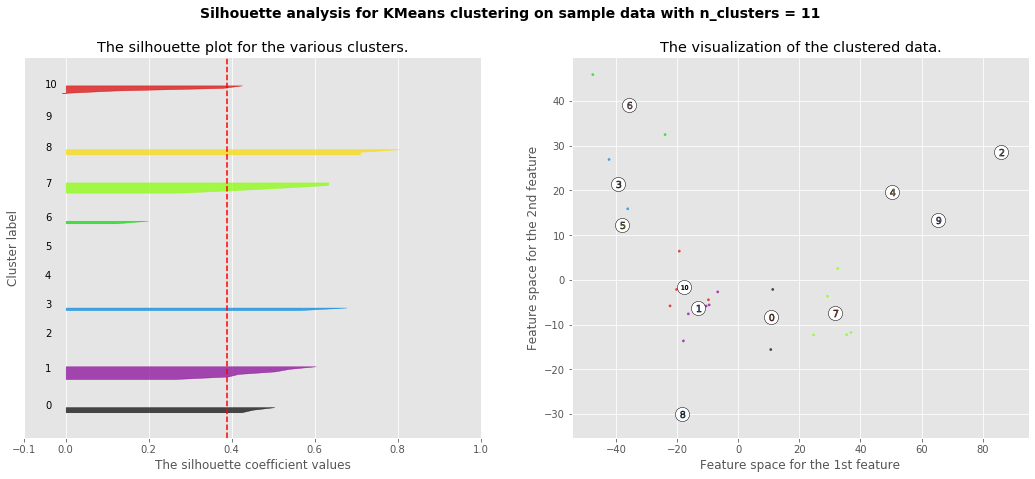

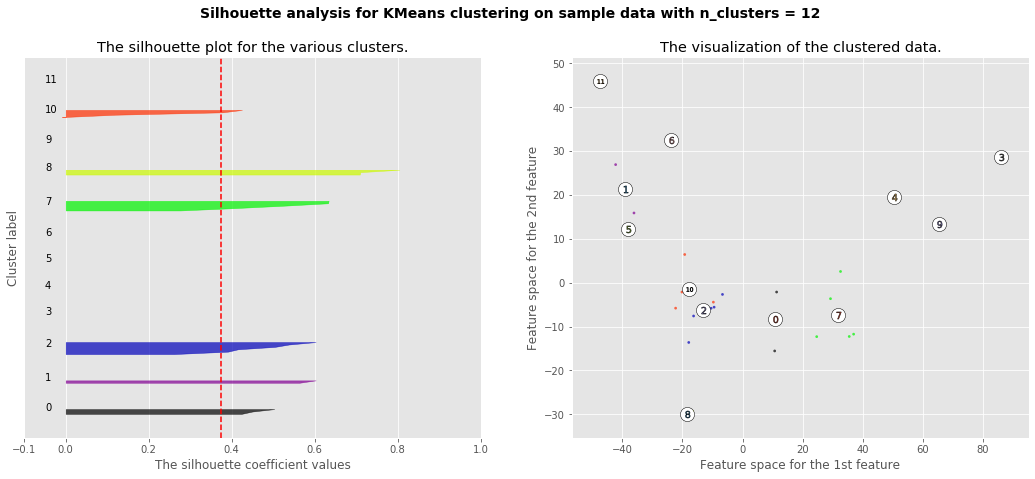

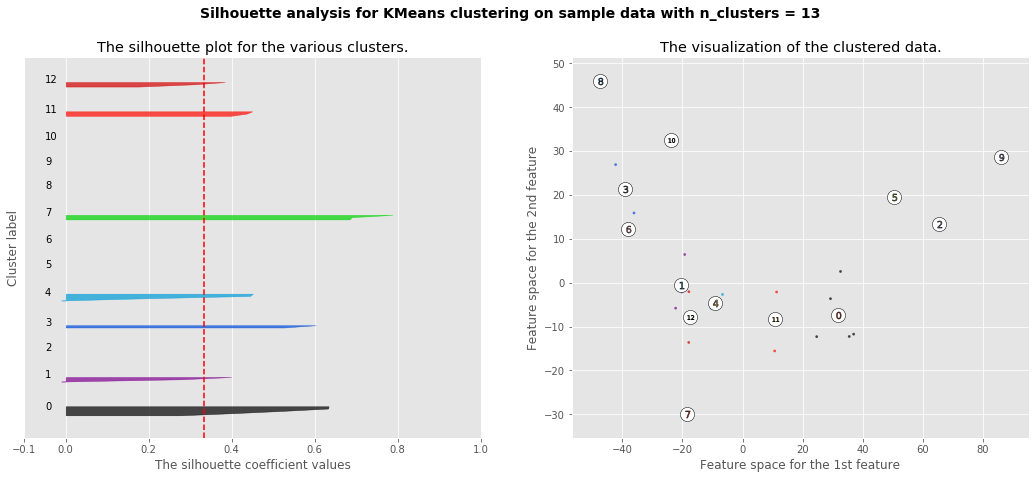

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

#print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
range_n_clusters = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df4) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df4)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df4, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df4, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df4[:, 0], df4[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

From the above we see that the cluster with the highest silhouette score is 7. This value can then be used for clustering the data set as required.